In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt :
    classLabels=fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', '', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', '', 'backpack', 'umbrella', '', '', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', '', 'diningtable', '', '', 'toilet', '', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

89


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x158bd0510>

## Read an Image

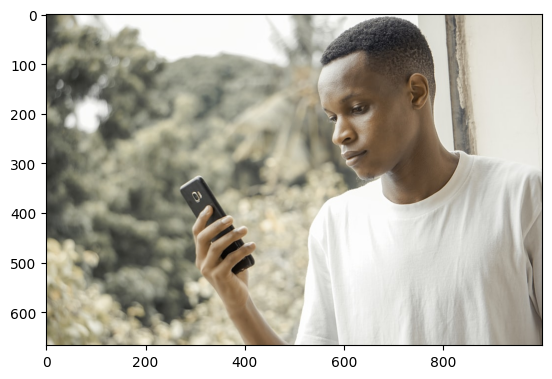

In [8]:
img = cv2.imread('human.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [10]:
print(ClassIndex)

[ 1 77]


In [11]:
font_scale=2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes,(0,255,255), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+25), font, fontScale=font_scale, color=(0, 0, 255), thickness=2)

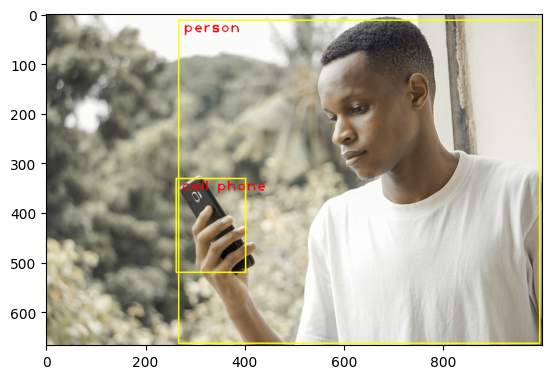

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")

font_scale=2
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.5)

    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if ClassInd<=80 :
                cv2.rectangle(frame, boxes,(0,255,255), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+25), font, fontScale=font_scale, color=(0, 0, 255), thickness=2)

    cv2.imshow('Object Detection Project', frame)

    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break

cap.release()
cv2.destroyAllWindows

[ 1 62 72]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62  1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 34]
[1]
[1]
[1]
[1]
[ 1 62]
[62  1]
[ 1 62]
[1]
[1 1 1]
[1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1 62  1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[ 1 62  1]
[1 1]
[ 1  1 62]
[ 1 62  1  1]
[ 1  1 62  1]
[ 1 62  1  1]
[ 1 62  1]
[1 1 1]
[ 1 62  1]
[1 1]
[ 1  1 62]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 58 54]
[ 1  1 58 54]
[ 1  1 58]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 6

<function destroyAllWindows>